In [1]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, art3d
from mpl_toolkits.mplot3d import proj3d

In [2]:
import collections

Arguments = collections.namedtuple('Settings', 
        ('radius', 'height', 'elevation', 'resolution', 'color', 'x_center', 'y_center','alpha_elements','alpha', 'theta'))

args = Arguments(radius=10, height=3, elevation=0, resolution = 25, color = 'b', x_center=0, y_center=0,alpha_elements= 0.4, alpha=0.2, theta=0.94 )

In [3]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

<IPython.core.display.Javascript object>


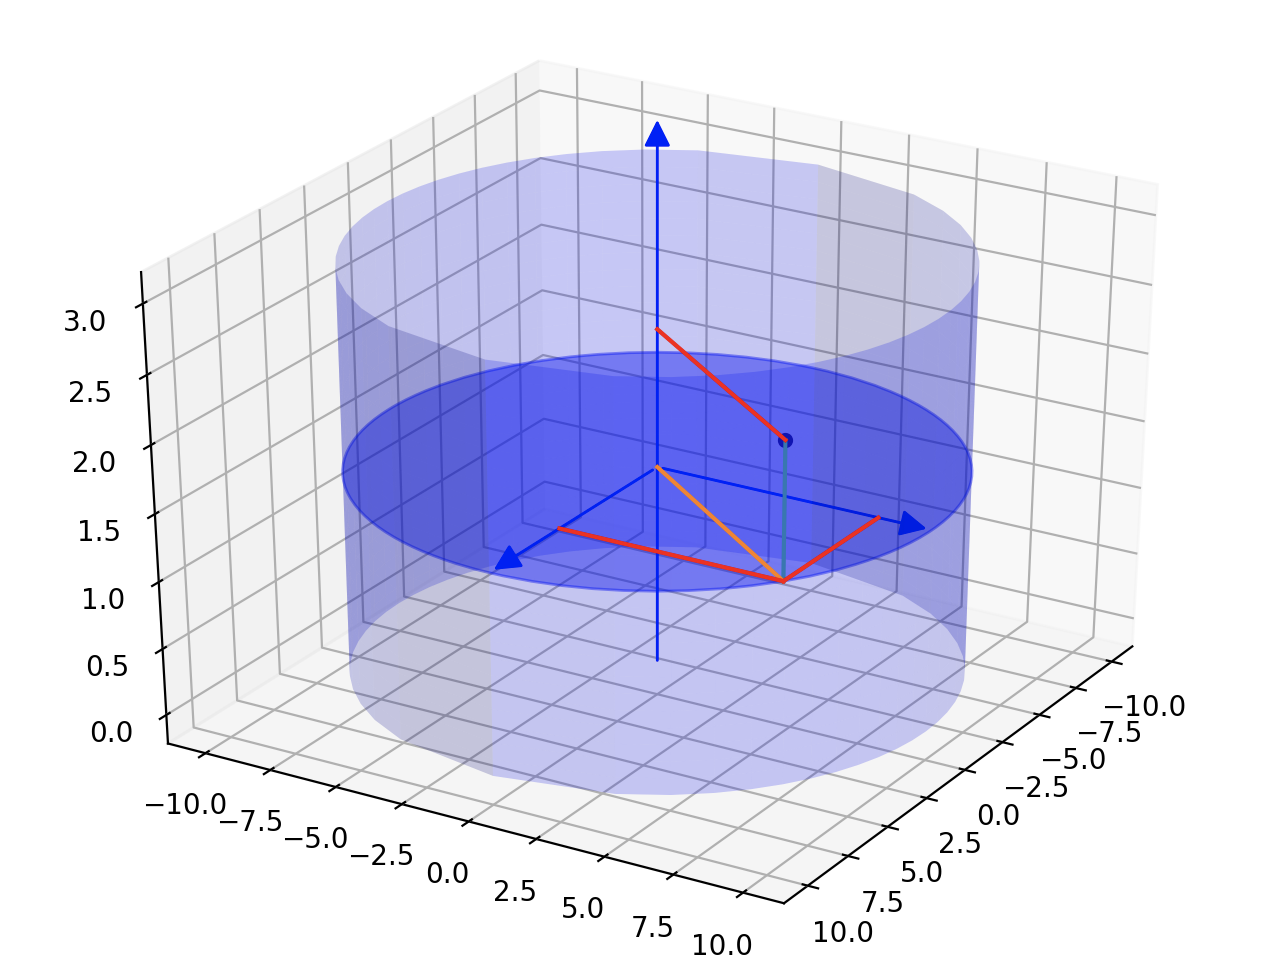

In [4]:
def draw_top_mid_bottom(args, ax):
       
    middle = Circle((args.x_center, args.y_center), args.radius, color=args.color, alpha=args.alpha_elements)
    ax.add_patch(middle)
    art3d.pathpatch_2d_to_3d(middle, z=args.elevation+args.height/2, zdir="z")

def draw_arrows(args, ax):
    
    z = Arrow3D([0,0],[0,0],[0,args.height+1], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
    x = Arrow3D([0,0],[0,args.radius],[args.height/2,args.height/2], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
    y = Arrow3D([0,args.radius],[0,0],[args.height/2,args.height/2], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")

    ax.add_artist(z)
    ax.add_artist(x)
    ax.add_artist(y)

def plot_3D_cylinder(args):
    
    fig = plt.figure()
    ax = Axes3D(fig, azim=30, elev=30)

    x = np.linspace(args.x_center-args.radius, args.x_center+args.radius, args.resolution)
    z = np.linspace(args.elevation, args.elevation+args.height, args.resolution)
    
    X, Z = np.meshgrid(x, z)

    Y = np.sqrt(args.radius**2 - (X - args.x_center)**2) + args.y_center
    
    x = np.array([args.radius * np.cos(args.theta)])
    y = np.array([args.radius * np.sin(args.theta)])
    z = np.array([2.5])
    
    # plot 3d point
    ax.scatter3D(x, y, z, c=z)

    # plot z projection down
    ax.plot([x, x],[y,y],[args.height/2,z], label='parametric curve')
    # plot O in z direction
    ax.plot([0, x],[0,y],[args.height/2,args.height/2], label='parametric curve')

    ax.plot_surface(X, Y, Z, linewidth=0, color=args.color, alpha=args.alpha)
    ax.plot_surface(X, (2*args.y_center-Y), Z, linewidth=0, color=args.color, alpha=args.alpha)

    # plot O in z direction

    a, b = [0, 0, z[0]], [x[0], y[0], z[0]]    
    ax.plot([a[0], b[0]], [a[1], b[1]], zs=[a[2], b[2]], c='red' )
    
    # plot x projection

    a, b = [x[0], 0, args.height/2], [x[0], y[0], args.height/2]    
    ax.plot([a[0], b[0]], [a[1], b[1]], zs=[a[2], b[2]], c='red' )

    # plot y projection

    a, b = [0, y[0], args.height/2], [x[0], y[0], args.height/2]    
    ax.plot([a[0], b[0]], [a[1], b[1]], zs=[a[2], b[2]], c='red' )

    draw_top_mid_bottom(args, ax)
    draw_arrows(args, ax)

    plt.show()

plot_3D_cylinder(args)